In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import starrotate as sr
from starrotate import rotation_tools as rt
from tqdm import trange

plotpar = {'axes.labelsize': 25,
           'font.size': 25,
           'legend.fontsize': 15,
           'xtick.labelsize': 22,
           'ytick.labelsize': 22,
           'text.usetex': True}
plt.rcParams.update(plotpar)

Load the asteroseismic physical and observable parameters.

In [16]:
asp = pd.read_csv("data/astero_physical.csv", skiprows=60)
asp.drop_duplicates(subset="KIC", keep='first', inplace=True)
asp.head()

,KIC,P,Mass,E_Mass,e_Mass,Rad,E_Rad,e_Rad,rho,E_rho,e_rho,log(g),E_log(g),e_log(g),Age,E_Age,e_Age
0,1430163,S,1.38,0.14,0.10,1.49,0.05,0.05,0.4195,0.0189,0.0181,4.234,0.014,0.015,1.3,0.6,0.7
1,1435467,S,1.16,0.20,0.06,1.63,0.08,0.05,0.2732,0.0073,0.0071,4.088,0.019,0.014,4.7,0.7,1.7
2,1725815,S,1.43,0.15,0.11,2.02,0.08,0.08,0.1732,0.0077,0.0074,3.982,0.014,0.014,3.1,0.7,0.8
3,2010607,S,1.37,0.15,0.14,2.42,0.12,0.11,0.0972,0.0079,0.0075,3.809,0.025,0.025,3.8,0.8,0.8
4,2309595,S,1.14,0.19,0.22,2.40,0.19,0.23,0.0828,0.0078,0.0067,3.734,0.013,0.013,6.0,4.5,1.5


In [17]:
aso = pd.read_csv("data/astero_observables.csv", skiprows=64)
aso.head()

,KIC,S,numax,e_numax,Dnu,e_Dnu,T(SDSS),e_T(SDSS),T(IRFM),e_T(IRFM),[Fe/H],e_[Fe/H],KICdata,Simbad,_RA,_DE
0,1430163,S,1867,92,84.6,2.0,6796,78,6806,177,-0.2,0.3,KICdata,Simbad,290.88843,37.089359
1,1435467,S,1295,52,70.8,0.8,6433,86,6521,164,-0.2,0.3,KICdata,Simbad,292.08270,37.059811
2,1725815,,1045,47,55.4,1.3,6550,82,6532,165,-0.2,0.3,KICdata,Simbad,292.41653,37.275181
3,2010607,,675,86,42.5,1.7,6361,71,6796,175,-0.2,0.3,KICdata,Simbad,290.50565,37.459011
4,2309595,,643,20,39.3,2.2,5238,65,5315,112,-0.2,0.3,KICdata,Simbad,292.90149,37.624481


Label wrangling

In [208]:
df = pd.merge(aso, asp, on="KIC", how="inner")

age, teff, logg = [np.zeros(len(df)) for i in range(3)]
for i, a in enumerate(df.Age.values):
    try:
        age[i] = float(a)
    except ValueError:
        age[i] = np.nan
    try:
        teff[i] = float(df["T(IRFM)"].values[i])
    except ValueError:
        teff[i] = np.nan
    try:
        logg[i] = float(df["log(g)"].values[i])
    except ValueError:
        logg[i] = np.nan

finite_mask = np.isfinite(age) * np.isfinite(teff) * np.isfinite(logg)
age, teff, logg = age[finite_mask], teff[finite_mask], logg[finite_mask]
kics = df.KIC.values[finite_mask]
print(len(age))

490


Now try to write the Cannon!

In [205]:
# N = len(age)
N = 200

npixels = 500
acfs, lags = [np.zeros((N, npixels)) for i in range(2)]
for i in trange(N):    
    path = f"/Users/rangus/.kplr/data/lightcurves/{str(int(kics[i])).zfill(9)}"
    time, flux, flux_err = rt.load_kepler_data(path)
#     tess = time < min(time) + 27
#     rotate = sr.RotationModel(time[tess], flux[tess], flux_err[tess])
    rotate = sr.RotationModel(time, flux, flux_err)
    rotate.ACF_rotation(0.02043365)

    acfs[i, :] = rotate.acf[:npixels]
    lags[i, :] = rotate.lags[:npixels]



  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 1/200 [00:00<01:33,  2.12it/s]

  1%|          | 2/200 [00:00<01:32,  2.15it/s]

  2%|▏         | 3/200 [00:01<01:26,  2.28it/s]

  2%|▏         | 4/200 [00:01<01:22,  2.39it/s]

  2%|▎         | 5/200 [00:02<01:18,  2.50it/s]

  3%|▎         | 6/200 [00:02<01:20,  2.42it/s]

  4%|▎         | 7/200 [00:02<01:23,  2.30it/s]

  4%|▍         | 8/200 [00:03<01:24,  2.27it/s]

  4%|▍         | 9/200 [00:03<01:26,  2.20it/s]

  5%|▌         | 10/200 [00:04<01:23,  2.29it/s]

  6%|▌         | 11/200 [00:04<01:24,  2.24it/s]

  6%|▌         | 12/200 [00:05<01:26,  2.17it/s]

  6%|▋         | 13/200 [00:05<01:26,  2.15it/s]

  7%|▋         | 14/200 [00:06<01:26,  2.14it/s]

  8%|▊         | 15/200 [00:06<01:26,  2.14it/s]

  8%|▊         | 16/200 [00:07<01:25,  2.15it/s]

  8%|▊         | 17/200 [00:07<01:25,  2.13it/s]

  9%|▉         | 18/200 [00:08<01:25,  2.12it/s]

 10%|▉         | 19/200 [00:08<01:26,  2.09it/s]

 10%|█         |

 72%|███████▎  | 145/200 [01:03<00:25,  2.17it/s]

 73%|███████▎  | 146/200 [01:03<00:23,  2.33it/s]

 74%|███████▎  | 147/200 [01:03<00:23,  2.27it/s]

 74%|███████▍  | 148/200 [01:04<00:23,  2.21it/s]

 74%|███████▍  | 149/200 [01:04<00:23,  2.14it/s]

 75%|███████▌  | 150/200 [01:05<00:23,  2.11it/s]

 76%|███████▌  | 151/200 [01:05<00:23,  2.09it/s]

 76%|███████▌  | 152/200 [01:06<00:21,  2.28it/s]

 76%|███████▋  | 153/200 [01:06<00:21,  2.22it/s]

 77%|███████▋  | 154/200 [01:07<00:21,  2.17it/s]

 78%|███████▊  | 155/200 [01:07<00:22,  2.02it/s]

 78%|███████▊  | 156/200 [01:08<00:21,  2.04it/s]

 78%|███████▊  | 157/200 [01:08<00:21,  2.04it/s]

 79%|███████▉  | 158/200 [01:09<00:20,  2.04it/s]

 80%|███████▉  | 159/200 [01:09<00:18,  2.23it/s]

 80%|████████  | 160/200 [01:10<00:18,  2.18it/s]

 80%|████████  | 161/200 [01:10<00:18,  2.15it/s]

 81%|████████  | 162/200 [01:11<00:17,  2.12it/s]

 82%|████████▏ | 163/200 [01:11<00:17,  2.09it/s]

 82%|████████▏ | 164/200 [01:11

Trim ACF down to just the starting few pixels.

In [209]:
print(np.shape(acfs))
_npixels = 50
_acfs = acfs[:, :_npixels]
print(np.shape(_acfs))

(200, 500)
(200, 50)


Do the linear regression

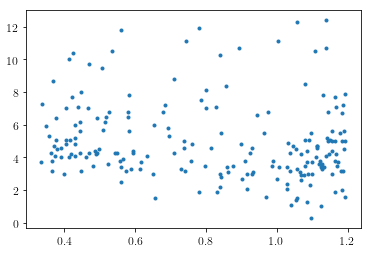

In [210]:
plt.plot(_acfs[:, 0], age[:N], ".");

In [211]:
def fit_to_pixel(pixel_acf_values, labels):
    """
    For each 'pixel' in the acf, fit a linear relation to the pixel values
    """
    
    A = np.concatenate((np.ones((len(labels), 1)), labels), axis=1)
    AT = A.T
    ATA = np.dot(AT, A)
    weights = np.linalg.solve(ATA, np.dot(AT, pixel_acf_values))
    return weights

# The labels
age, teff, logg = age[:N], teff[:N], logg[:N]
dnu, numax = df.Dnu.values[:N], df.numax.values[:N]

labels = np.array([age, teff, logg,
                   age**2, teff**2, logg**2,
                   age*teff, age*logg, teff*logg]).T

weights = np.zeros((_npixels, 10))#len(labels)+1))  # 3))
for pixel in range(_npixels):
#     print(np.shape(acfs[:, pixel]), np.shape(labels), np.shape(weights[pixel, :]))
    weights[pixel, :] = fit_to_pixel(_acfs[:, pixel], labels)

In [212]:
from scipy.optimize import minimize

ind = 40
y_new = np.copy(_acfs[ind])

def nll(labels_pred, y_val):
    A_pred = np.append([1], labels_pred)
    mod_pred = np.dot(weights, A_pred)
    return 0.5 * np.sum((y_val - mod_pred)**2)

Loop over training stars

In [213]:
from tqdm import trange

predicted = np.zeros((N, 9))
chi2 = np.zeros(N)
for star in trange(N):
    soln = minimize(nll, 
                    [age[star], teff[star], logg[star],
                     age[star]**2, teff[star]**2, logg[star]**2,
                     age[star]*teff[star], age[star]*logg[star],
                     teff[star]*logg[star]], args=(_acfs[star, :],))
    predicted[star, :] = soln.x
    chi2[star] = soln.fun



  0%|          | 0/200 [00:00<?, ?it/s]

  6%|▌         | 12/200 [00:00<00:01, 118.09it/s]

 14%|█▎        | 27/200 [00:00<00:01, 125.27it/s]

 21%|██        | 42/200 [00:00<00:01, 129.81it/s]

 28%|██▊       | 57/200 [00:00<00:01, 134.48it/s]

 36%|███▋      | 73/200 [00:00<00:00, 139.26it/s]

 43%|████▎     | 86/200 [00:00<00:00, 136.13it/s]

 50%|█████     | 100/200 [00:00<00:00, 136.23it/s]

 57%|█████▊    | 115/200 [00:00<00:00, 138.31it/s]

 64%|██████▍   | 129/200 [00:00<00:00, 137.50it/s]

 72%|███████▏  | 144/200 [00:01<00:00, 138.77it/s]

 80%|███████▉  | 159/200 [00:01<00:00, 141.09it/s]

 87%|████████▋ | 174/200 [00:01<00:00, 141.27it/s]

 94%|█████████▍| 188/200 [00:01<00:00, 138.88it/s]

100%|██████████| 200/200 [00:01<00:00, 140.06it/s]

Loop over test stars.

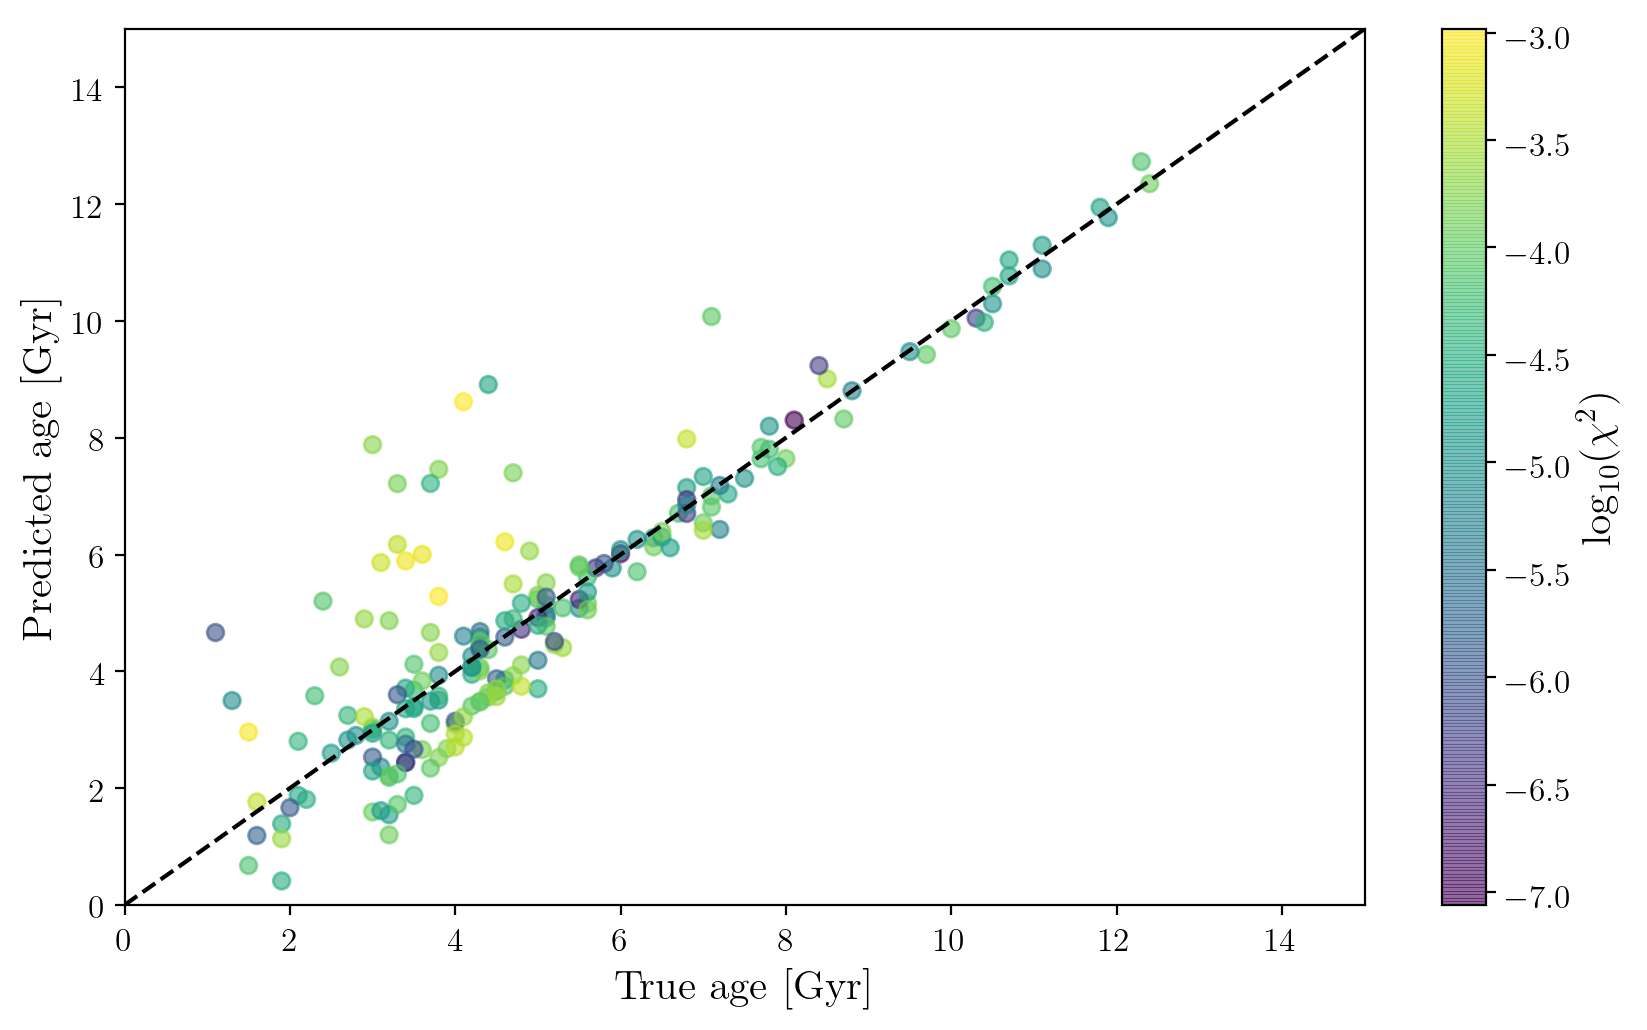

In [214]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(age[:N], predicted[:, 0], c=np.log10(chi2), 
            alpha=.6, rasterized=True)
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Predicted~age~[Gyr]}$");
xs = np.linspace(0, 15, 100)
plt.plot(xs, xs, color="k", ls="--")
plt.colorbar(label="$\log_{10}(\chi^2)$")
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.subplots_adjust(bottom=.15)

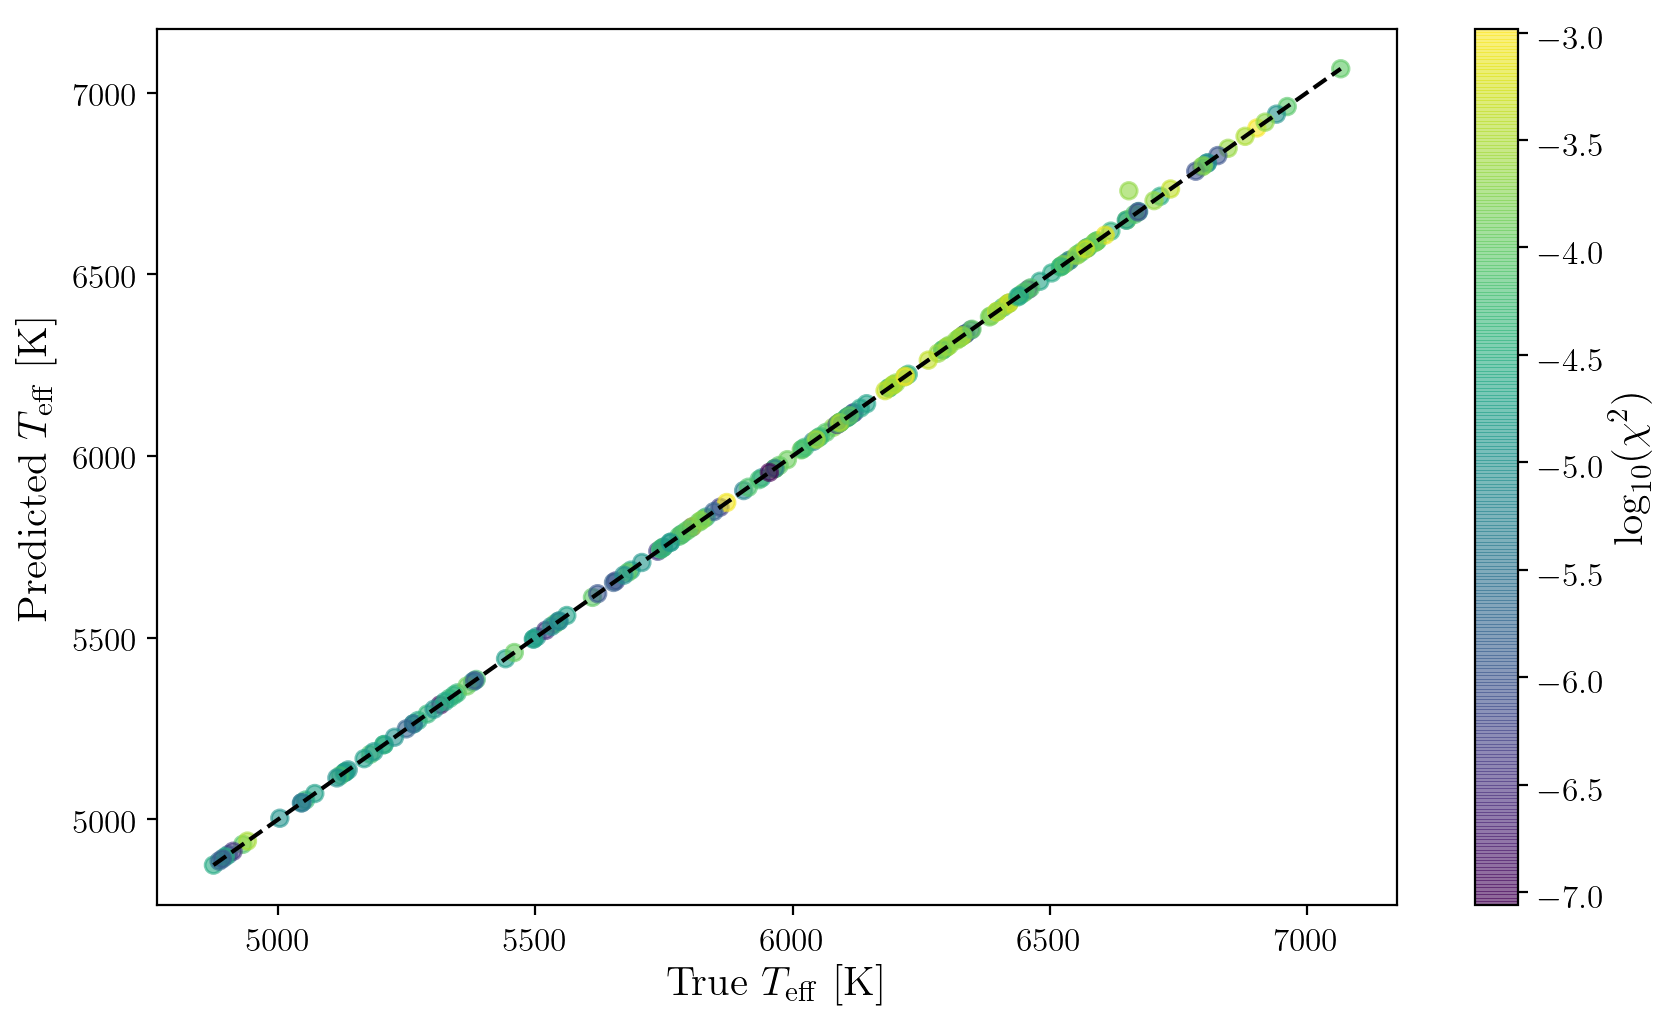

In [215]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(teff[:N], predicted[:, 1], c=np.log10(chi2), 
            alpha=.6, rasterized=True)
plt.xlabel("$\mathrm{True~}T_\mathrm{eff}\mathrm{~[K]}$")
plt.ylabel("$\mathrm{Predicted~}T_\mathrm{eff}\mathrm{~[K]}$");
xs = np.linspace(min(teff), max(teff), 100)
plt.plot(xs, xs, color="k", ls="--")
plt.subplots_adjust(bottom=.15)
plt.colorbar(label="$\log_{10}(\chi^2)$")

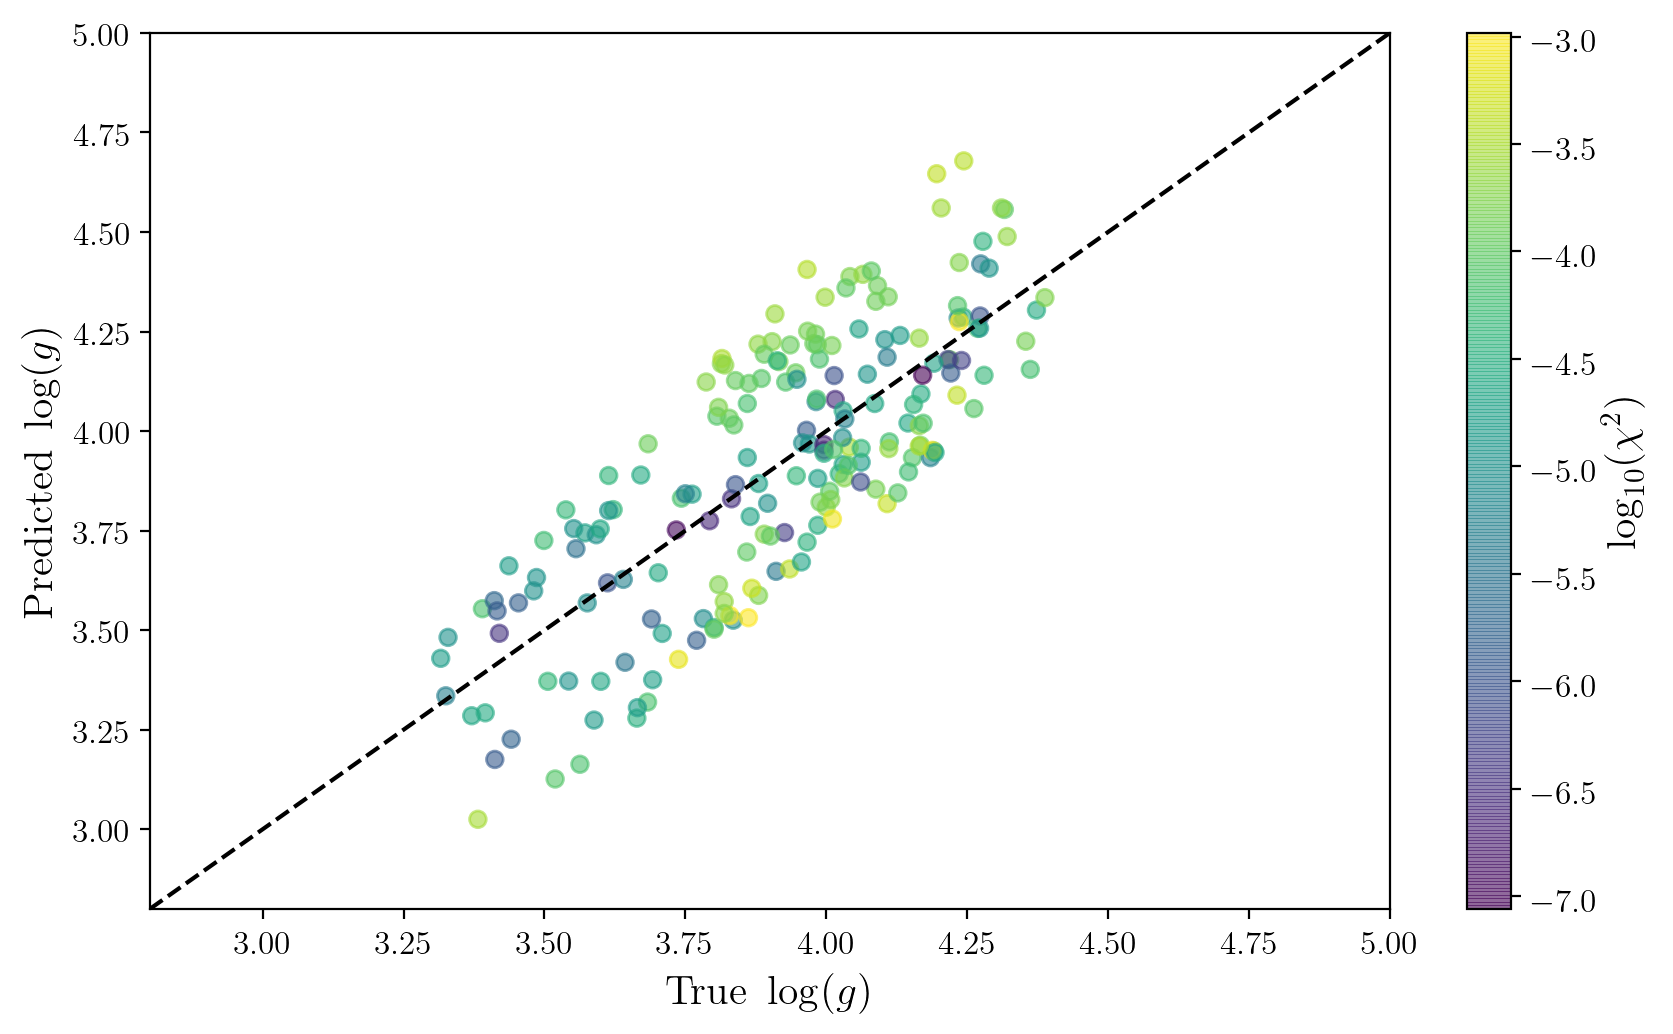

In [216]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(logg[:N], predicted[:, 2], c=np.log10(chi2),
            alpha=.6, rasterized=True)
plt.xlabel("$\mathrm{True~}\log(g)$")
plt.ylabel("$\mathrm{Predicted~}\log(g)$");
xs = np.linspace(2.8, 5, 100)
plt.plot(xs, xs, color="k", ls="--")
plt.xlim(2.8, 5)
plt.ylim(2.8, 5.)
plt.subplots_adjust(bottom=.15)
plt.colorbar(label="$\log_{10}(\chi^2)$")

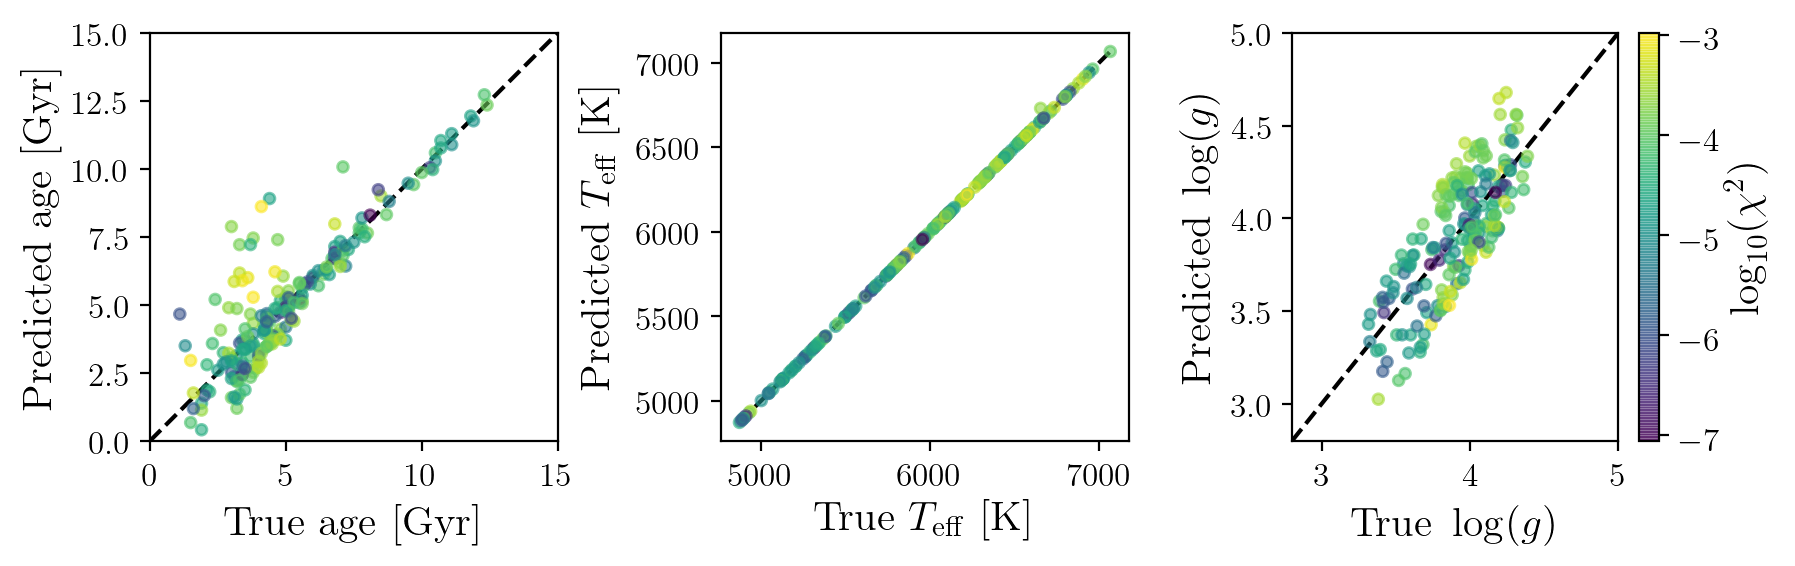

In [217]:
plotpar = {'axes.labelsize': 15,
           'font.size': 15,
           'legend.fontsize': 15,
           'xtick.labelsize': 12,
           'ytick.labelsize': 12,
           'text.usetex': True}
plt.rcParams.update(plotpar)

plt.figure(figsize=(10, 3), dpi=200)
plt.subplot(1, 3, 1)

plt.scatter(age[:N], predicted[:, 0], c=np.log10(chi2), s=15, zorder=1,
            alpha=.6, rasterized=True)
plt.xlabel("$\mathrm{True~age~[Gyr]}$")
plt.ylabel("$\mathrm{Predicted~age~[Gyr]}$");
xs = np.linspace(0, 15, 100)
plt.plot(xs, xs, color="k", ls="--", zorder=0)
plt.xlim(0, 15)
plt.ylim(0, 15)

plt.subplot(1, 3, 2)
plt.scatter(teff[:N], predicted[:, 1], c=np.log10(chi2), s=15, zorder=1,
            alpha=.6, rasterized=True)
plt.xlabel("$\mathrm{True~}T_\mathrm{eff}\mathrm{~[K]}$")
plt.ylabel("$\mathrm{Predicted~}T_\mathrm{eff}\mathrm{~[K]}$");
xs = np.linspace(min(teff), max(teff), 100)
plt.plot(xs, xs, color="k", ls="--", zorder=0)
plt.subplots_adjust(bottom=.15)

plt.subplot(1, 3, 3)
plt.scatter(logg[:N], predicted[:, 2], c=np.log10(chi2), s=15, zorder=1,
            alpha=.6, rasterized=True)
plt.xlabel("$\mathrm{True~}\log(g)$")
plt.ylabel("$\mathrm{Predicted~}\log(g)$");
xs = np.linspace(2.8, 5, 100)
plt.plot(xs, xs, color="k", ls="--", zorder=0)
plt.xlim(2.8, 5)
plt.ylim(2.8, 5.)
plt.subplots_adjust(bottom=.15)
plt.colorbar(label="$\log_{10}(\chi^2)$")

plt.subplots_adjust(wspace=.4, bottom=.2)

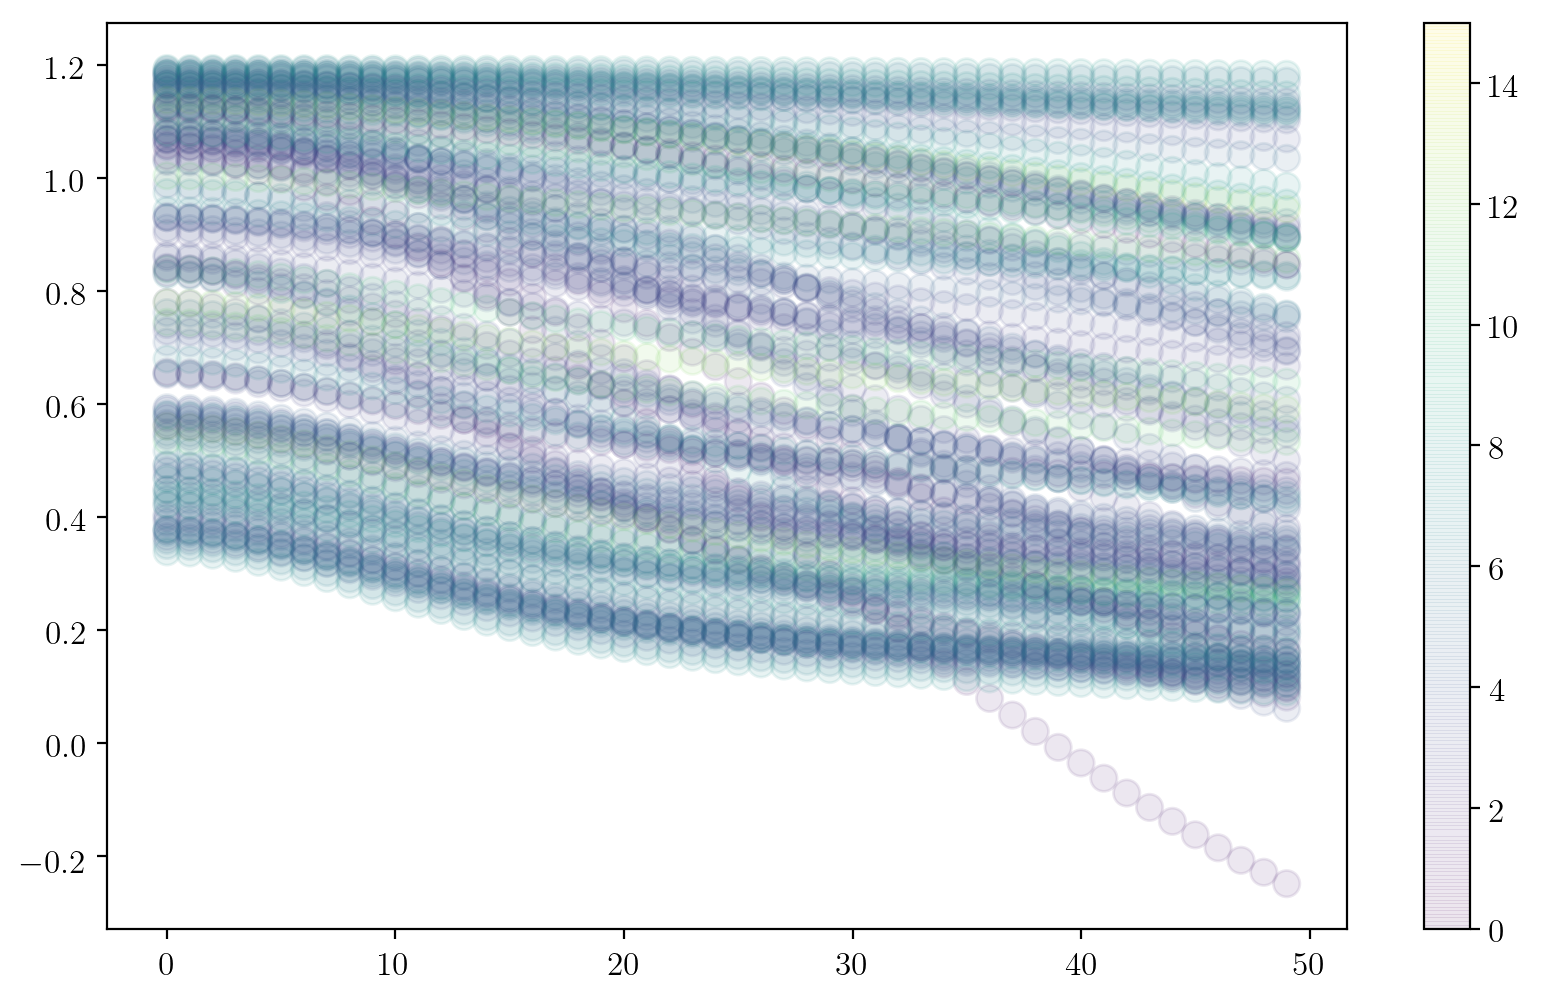

In [218]:
plt.figure(figsize=(10, 6), dpi=200)
for i in range(100):
    plt.scatter(np.arange(50), _acfs[i], c=np.ones_like(_acfs[i])*age[i], s=90,
                vmin=0, vmax=15, alpha=.1, rasterized=True);
plt.colorbar()